# Introduction to Constrained Continuous Optimization

```{admonition} Learning outcomes
After reading this note, you will be able to:
- Define optimality conditions for constrained problems
- Model and solve linear optimization problems
- Model and solve non-linear optimization problems
```

Many applications of optimization require solutions that satisfy a set of *constraints*. For example, in a Vehicle Routing Problem (VRP), one seeks to route a set of trucks through a set of customer locations while minimizing the total travel time; constraints are needed to ensure that each customer is serviced by exactly one truck, that each truck starts its route at the depot and returns to it, and that truck capacities are not exceeded. In a workforce scheduling problem, workers are assigned tasks such that they perform at most one task at any given time and are not overworked overall.

Formally, a constraint should be seen as an expression of the form:
```{math}
c'(\boldsymbol{x}) \leq b.
````
The left-hand side is the output of a real-valued function $c': \mathbb{R}^n\mapsto\mathbb{R}$ that maps an assignment of values to the variables $\boldsymbol{x}$ to a scalar value. That value is then compared to the right-hand side, $b\in\mathbb{R}$. Constraints of the form $c'(\boldsymbol{x}) \geq b$ can be expressed as $-c(\boldsymbol{x}) \leq -b$ so we will use less-than-or-equal constraints without loss of generality. It is equivalent to redefine the left-hand side to $c(\boldsymbol{x}) = c'(\boldsymbol{x}) - {b}$ so that an inequality constraint can be rewritten as:
```{math}
c(\boldsymbol{x}) \leq 0.
````

For example, if a variable $x_i\in\mathbb{R}$ represents the amount of money spent towards acquiring a certain product and there is a budget of $b$ dollars, then $c(\boldsymbol{x})=\sum_{i=1}^{n}{x_i}-b$. Bound constraints are also commonly used. For instance, you cannot spend a negative amount of money or more than a certain amount $d$ for a specific product, meaning that $c_{i1}(x_i)=x_i-d$, $c_{i2}(x_i)=-x_i$ and the constraints are written as $c_{i1}(x_i)\leq 0$ and $c_{i2}(x_i)\leq 0$.

Alternatively, one may need to enforce an *equality constraint*:
```{math}
c(\boldsymbol{x}) = 0.
````
We will use $[m]$ to denote the set of integers from $1$ to $m$ inclusive, i.e., $[m]=1,\cdots,m$. For a constrained optimization problem with $m$ constraints, we will split the set $[m]$ of constraint indices into two disjoint subsets: $\mathcal{I}$, the set of inequality constraints and $\mathcal{E}$, the set of equality constraints. One of these sets may be empty and their union is equal to $m$, i.e., $\mathcal{I}\cup\mathcal{E}=[m]$. A continuous constrained optimization problem on $n$ continuous variables can then be expressed as follows:
```{math}
\min_{\boldsymbol{x}\in\mathbb{R}^n} \quad & f(\boldsymbol{x})\\
\text{subject to} \quad & c_i(\boldsymbol{x}) \leq 0, \quad\forall i\in\mathcal{I},\\
& c_i(\boldsymbol{x}) = 0, \quad\forall i\in\mathcal{E}.
````


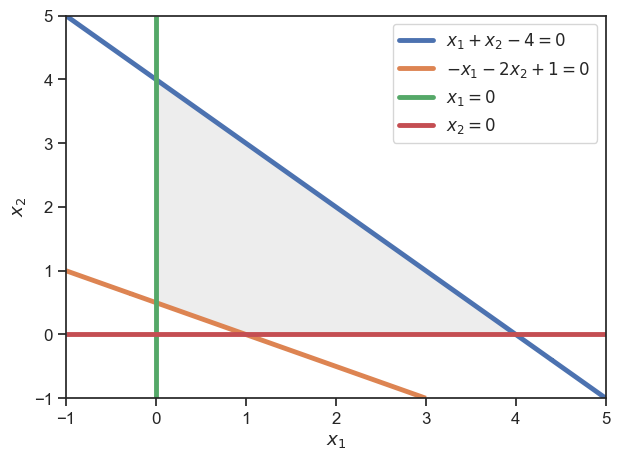

In [4]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 3.5})
sns.set_style("white")
sns.set_style("ticks")

x1, x2 = symbols('x1 x2')
p1 = plot_implicit(
    Eq(x1 + x2 - 4, 0),
    Eq(-x1 + -2*x2 + 1, 0),
    Eq(x1, 0),
    Eq(x2, 0),
    (x1, -1, 5), (x2, -1, 5),
    show=False, grid=False)

p2 = plot_implicit(
    And(x1 + x2 - 4 <= 0, -x1 + -2*x2 + 1 <= 0, -x1 <= 0, -x2 <= 0),
    (x1, -1, 5), (x2, -1, 5),
    {'alpha':0.075}, color='k', show=False, grid=False, show_in_legend=False)

p1.append(p2[0])
p1.show()

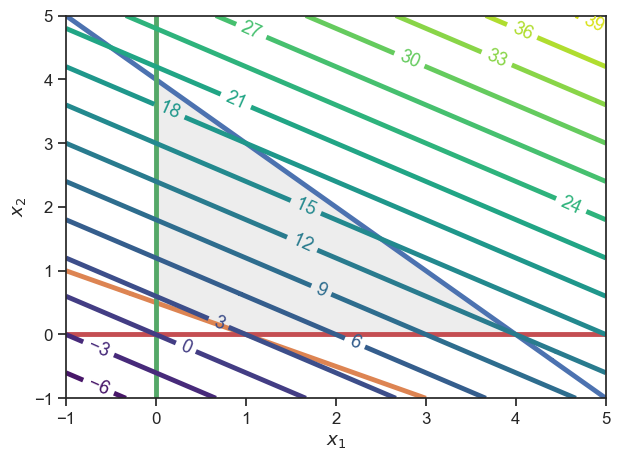

In [8]:
x1, x2 = symbols('x1 x2')
p1 = plot_implicit(
    Eq(x1 + x2 - 4, 0),
    Eq(-x1 + -2*x2 + 1, 0),
    Eq(x1, 0),
    Eq(x2, 0),
    (x1, -1, 5), (x2, -1, 5),
    show=False, grid=False, show_in_legend=False)

p2 = plot_implicit(
    And(x1 + x2 - 4 <= 0, -x1 + -2*x2 + 1 <= 0, -x1 <= 0, -x2 <= 0),
    (x1, -1, 5), (x2, -1, 5),
    {'alpha':0.075}, color='k', show=False, grid=False, show_in_legend=False)
objective_contour = plot_contour(3*x1+5*x2,  (x1, -1, 5), (x2, -1, 5), {"levels": 15}, is_filled=False, show=False, legend=False)
p1.append(objective_contour[0])

p1.append(p2[0])
p1.show()

<!-- 
Constrained opt

Taylor 1st order 
https://mathinsight.org/dot_product


Constraints, polytopes, QLP illustration

LP

https://en.wikipedia.org/wiki/Lagrange_multiplier#Examples

https://github.com/mechmotum/cyipopt/blob/master/examples/hs071_scipy_jax.py

Solvers (cvxpy, ipopt)
 -->

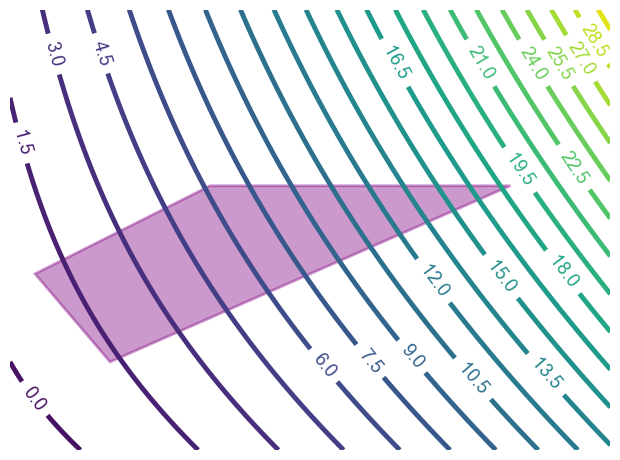

In [9]:
fig, ax = plt.subplots()
ax.set_axis_off()

x1, x2 = symbols('x1 x2')
line1 = x1 + x2
quadratic1 = x1*x2 + 0.3*x1**2 + line1
objective_contour = plot_contour(quadratic1,  (x1, 0, 6), (x2, -0.5, 2), {"levels": 25}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)

pt1, pt2, pt3, pt4, pt5 = [(0.25, 0.5), (1, 0), (5, 1), (0, 1), (2, 1)]
polytope = plot_geometry(Polygon(pt1, pt2, pt3, pt4, pt5), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)

objective_contour.append(polytope[0])
objective_contour.show()

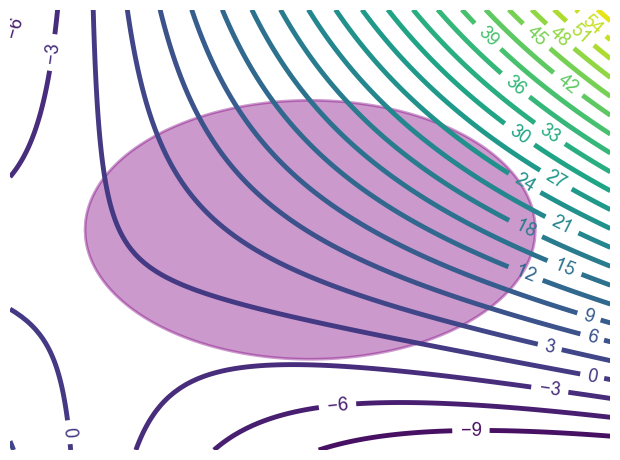

In [10]:
fig, ax = plt.subplots()
ax.set_axis_off()

x1, x2 = symbols('x1 x2')
line1 = x1 + x2
quadratic1 = x1*x2 + 0.3*x1**2 + line1
objective_contour = plot_contour(quadratic1,  (x1, -2, 6), (x2, -4, 6), {"levels": 25}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)

# pt1, pt2, pt3, pt4, pt5 = [(0.25, 0.5), (1, 0), (5, 1), (0, 1), (2, 1)]
# polytope = plot_geometry(Polygon(pt1, pt2, pt3, pt4, pt5), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)
polytope = plot_geometry(Ellipse(Point(2, 1), hradius=3, eccentricity=Rational(1, 5)), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)

objective_contour.append(polytope[0])
objective_contour.show()


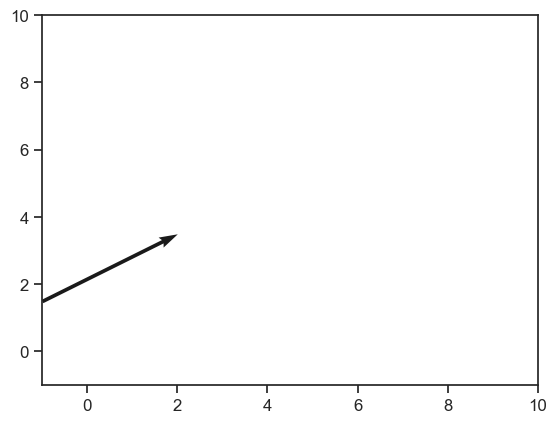

In [7]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[-1, 1.5, 3, 2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
